# Assignment 4. Deep Learning

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For questions 1 refer to @alino_9 on Telegram.*

### Description  
This homework consists of four questions, each aimed at one category in the world of Deep Learning.   
1. Getting familiarized with sentiment analysis (A subject also covered in the course project).
   
2. Multi-layer perceptron (MLP). 
   
3. Convolutional Neural Networks (CNN).
   
4. Variational Autoencoders (VAE).

### Information  
Complete the information box below.

In [1]:
full_name = 'Ilia Hashemi Rad'
student_id = '99102456'

### Note
The questions are not necessarily in order of difficulty. You are obligated to answer **3 out of 4** questions. The fourth question is optional and is considered as bonus.

## 1 Twitter Sentiment Analysis

In [2]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### 1.1 Load and Visualize Dataset

In [3]:
## Load dataset and print the length of train and test
train = pd.read_csv('/kaggle/input/tweets/train-tweets.csv')
test = pd.read_csv('/kaggle/input/tweets/test-tweets.csv')

In [3]:
# Show some samples of train set and test set
print('First five elements of train set:')
train.head()

First five elements of train set:


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
print('First five elements of test set:')
test.head()

First five elements of test set:


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
# Check if there is any null value in train and test
print(f"Number of null values in train set: {train.isnull().sum()}")

print(f"Number of null values in test set: {test.isnull().sum()}")

Number of null values in train set: id       0
label    0
tweet    0
dtype: int64
Number of null values in test set: id       0
tweet    0
dtype: int64


In [6]:
# Show 10 negative comments from train set
# Filter the negative comments
negative_comments = train[train['label'] == 1]
# Show 10 samples from that
negative_comments.head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [7]:
# Show 10 positive comments from train set
# Filter the positive comments
positive_comments = train[train['label'] == 0]
# Show 10 samples from that
positive_comments.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


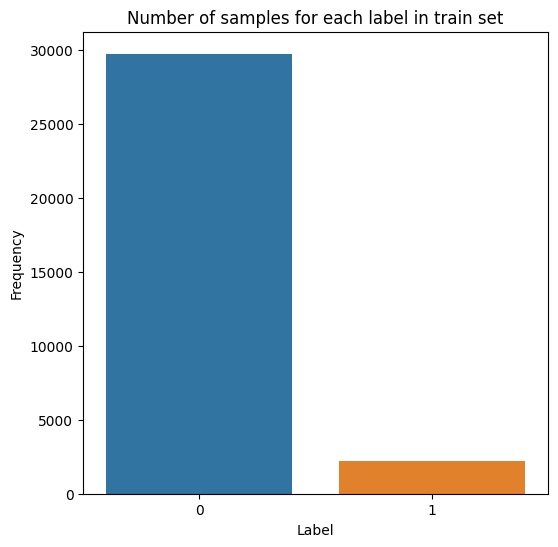

In [8]:
# Using barplot plot the number of samples for each label in train set
import seaborn as sns

# Record the number of samples for each label in train set
label_counts = train['label'].value_counts()
# Plot the result
plt.figure(figsize=(6,6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Number of samples for each label in train set')
plt.ylabel('Frequency')
plt.xlabel('Label')
plt.show()

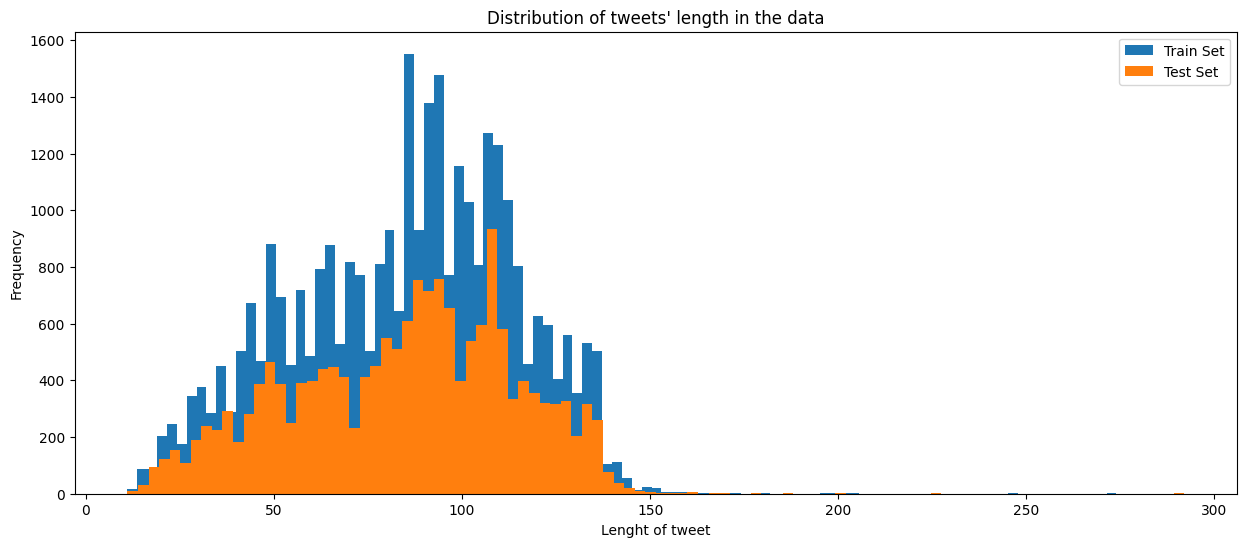

In [9]:
# Plot the distribution of tweets' length in the data (both train and test in one figure)
plt.figure(figsize=(15,6))
plt.hist(train['tweet'].apply(len), bins=100, label='Train Set')
plt.hist(test['tweet'].apply(len), bins=100, label='Test Set')
plt.title("Distribution of tweets' length in the data")
plt.ylabel('Frequency')
plt.xlabel('Lenght of tweet')
plt.legend()
plt.show()

In [10]:
# Add a column to represent the length of the tweet
train['len'] = train['tweet'].apply(len)
test['len'] = test['tweet'].apply(len)

In [11]:
train.head(5)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [12]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

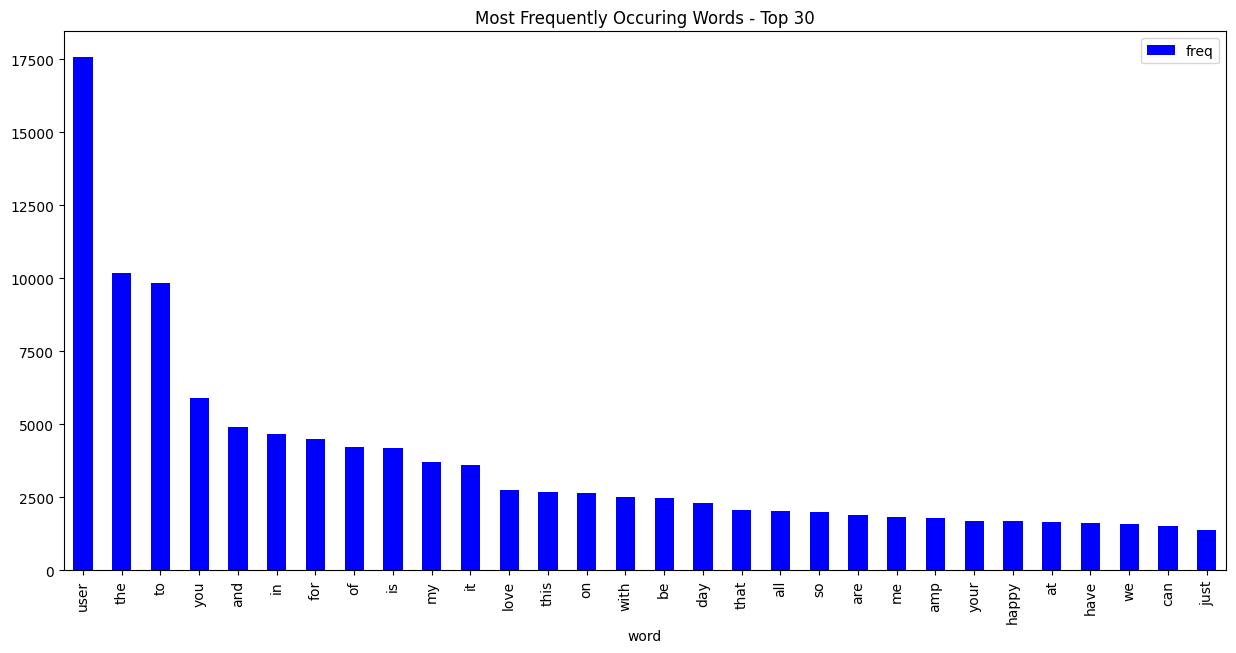

In [13]:
# Find top 30 most frequency words in the train set
# hint: you can use CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

def word_frequency(data):
    tweets = data['tweet']

    # Initialize the CountVectorizer
    vectorizer = CountVectorizer(max_features=30)

    # Fit and transform the training set to get the word frequency matrix
    tweet_word_counts = vectorizer.fit_transform(tweets)

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Sum the counts of each word across all documents
    word_freq = tweet_word_counts.sum(axis=0).A1

    # Create a DataFrame with words and their frequencies
    words_freq = pd.DataFrame({'word': feature_names, 'freq': word_freq})

    # Sort the DataFrame by frequency in descending order
    words_freq = words_freq.sort_values(by='freq', ascending=False)
    
    return words_freq
    

words_freq = word_frequency(train).head(30)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

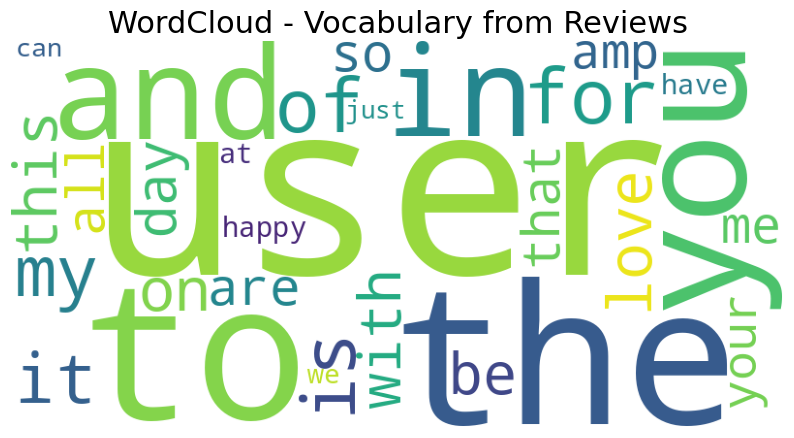

In [14]:
# plot the WordCloud for top 30 words
from wordcloud import WordCloud

# Determine dict of top 30 words
top_words_dict = dict(zip(words_freq['word'], words_freq['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_dict)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)
plt.axis('off')
plt.show()

In [15]:
words_freq = word_frequency(positive_comments).head(30)

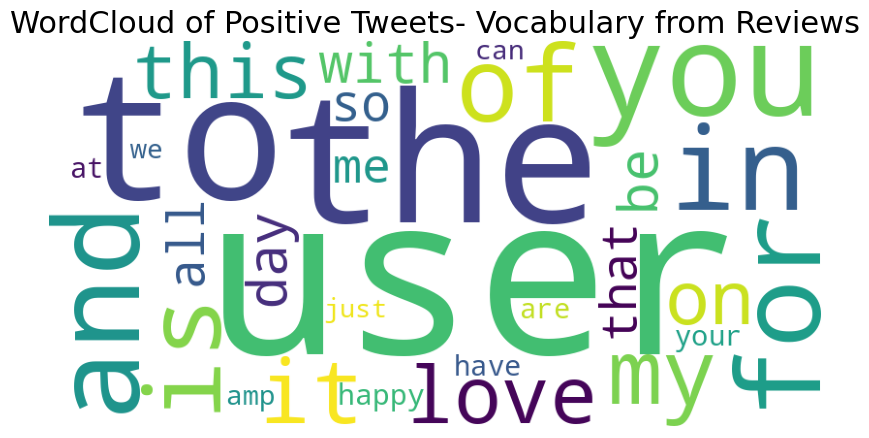

In [16]:
# plot the WordCloud for all words with positive label
words_freq = word_frequency(positive_comments).head(30)

# Determine dict of top 30 words
top_words_dict = dict(zip(words_freq['word'], words_freq['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_dict)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud of Positive Tweets- Vocabulary from Reviews", fontsize = 22)
plt.axis('off')
plt.show()

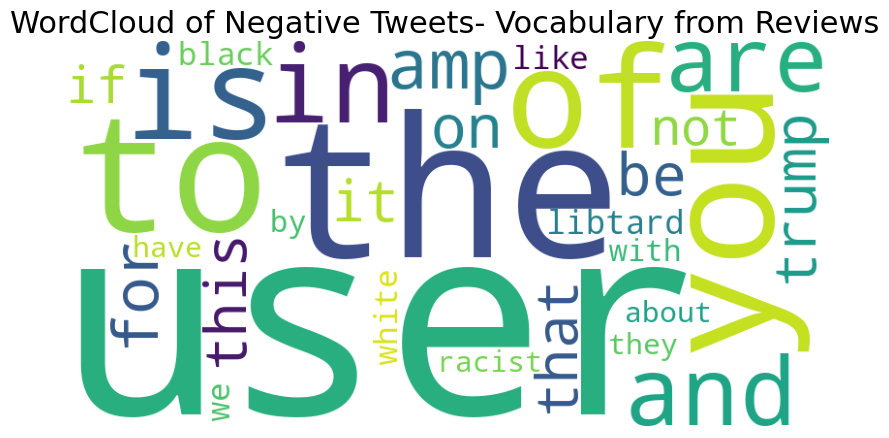

In [17]:
# plot the WordCloud for all words with negative label
words_freq = word_frequency(negative_comments).head(30)

# Determine dict of top 30 words
top_words_dict = dict(zip(words_freq['word'], words_freq['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_dict)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud of Negative Tweets- Vocabulary from Reviews", fontsize = 22)
plt.axis('off')
plt.show()

In [18]:
# Define a function to extract the hashtags
# The output must be a list of hashtags
import re
def hashtag_extract(x):
    hashtags = re.findall(r"#(\w+)", x)
    # TODO: Write your code here
    return hashtags

In [19]:
# extract hashtags from non racist/sexist (positive or neutral) tweets
HT_regular = positive_comments['tweet'].apply(hashtag_extract)

# extract hashtags from racist/sexist (negative) tweets
HT_negative = negative_comments['tweet'].apply(hashtag_extract)

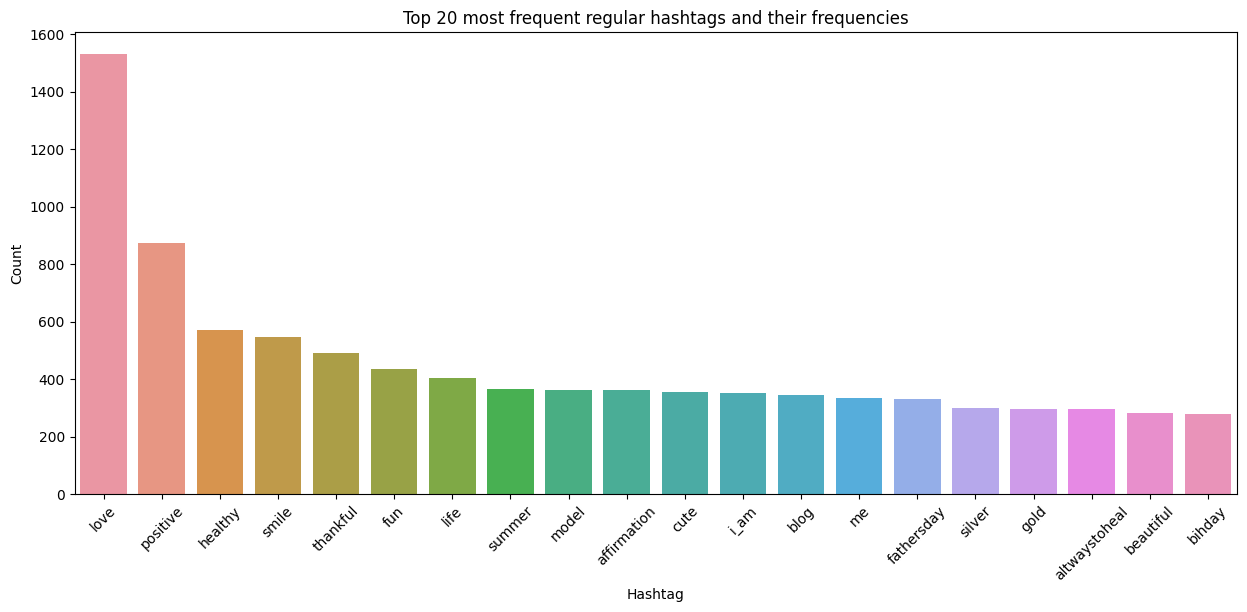

In [20]:
# Make a dataframe of regular hashtags and their count
# hint: you can use 'nltk' library
import nltk

a = nltk.FreqDist(sum(HT_regular,[]))
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Select top 20 most frequent hashtags and plot their frequencies
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(15,6))
sns.barplot(data=d, x="Hashtag", y="Count")
plt.title('Top 20 most frequent regular hashtags and their frequencies')
plt.xticks(rotation=45)
plt.show()

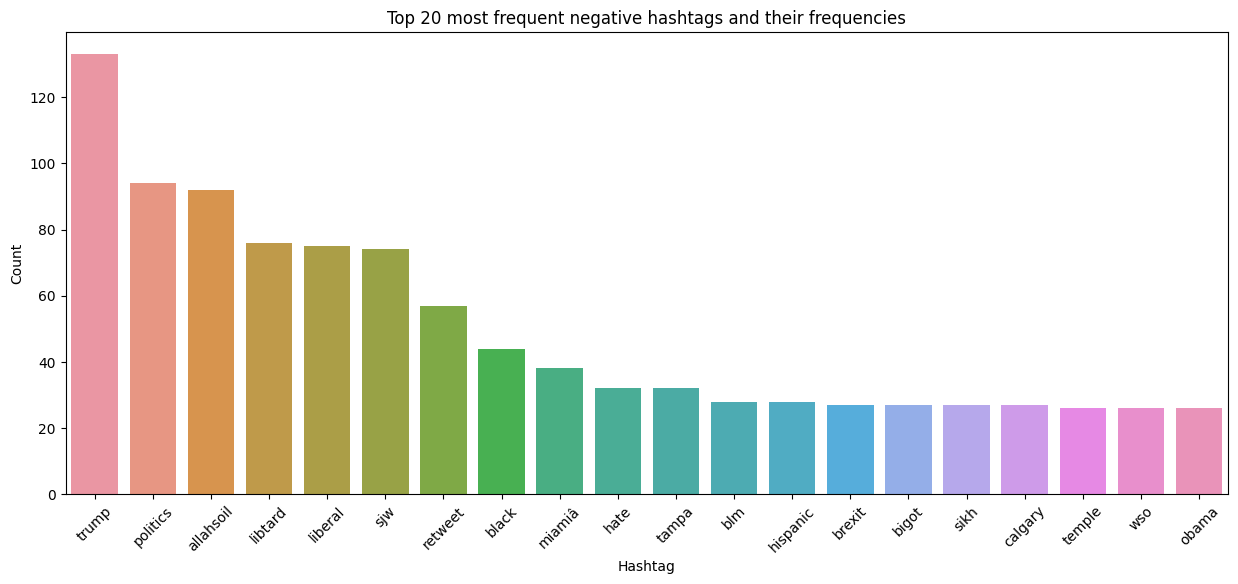

In [21]:
# Make a dataframe of negative hashtags and their count
a = nltk.FreqDist(sum(HT_negative,[]))
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Select top 20 most frequent hashtags and plot their frequencies
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(15,6))
sns.barplot(data=d, x="Hashtag", y="Count")
plt.title('Top 20 most frequent negative hashtags and their frequencies')
plt.xticks(rotation=45)
plt.show()

### 1.2 Pre-processing and Processing

In [4]:
# tokenize the words present in the train set and then train a Word2Vec model (use seed=34)
# hint: you can use 'gensim' library
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt') 
train_set = train['tweet']

# Tokenize the words
tokenized_tweet = train_set.apply(lambda x: word_tokenize(x.lower()))  # Convert to lowercase

# Train a Word2Vec model
model_Word2Vec = Word2Vec(sentences=tokenized_tweet, seed=34)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Using the model you trained, print most similar words to 'dinner'
similar_words_to_dinner = model_Word2Vec.wv.most_similar('dinner', topn=10)

# Print the most similar words to 'dinner'
print(f"Most similar words to 'dinner': {similar_words_to_dinner}")

Most similar words to 'dinner': [('shopping', 0.9748157858848572), ('bestie', 0.9650024175643921), ('brunch', 0.9563457369804382), ('ð\x9f\x98\x8e', 0.9501786231994629), ('vegas', 0.9492673873901367), ('brighton', 0.9489811062812805), ('datenight', 0.9475221037864685), ('goodtime', 0.9467257261276245), ('ð\x9f\x98\x81ð\x9f\x98\x81ð\x9f\x98\x81', 0.9455868601799011), ('anniversary', 0.945061981678009)]


In [6]:
# Using the model you trained, print most similar words to 'cancer'
similar_words_to_cancer = model_Word2Vec.wv.most_similar('cancer', topn=10)

# Print the most similar words to 'dinner'
print(f"Most similar words to 'cancer': {similar_words_to_cancer}")

Most similar words to 'cancer': [('walking', 0.9717882871627808), ('level', 0.9661135077476501), ('base', 0.9659218788146973), ('canadian', 0.9656223058700562), ('pics', 0.9640485048294067), ('age', 0.9622601866722107), ('coz', 0.9615523815155029), ('checking', 0.9614975452423096), ('turns', 0.9614489078521729), ('five', 0.9609004259109497)]


In [7]:
# Using the model you trained, print most similar words to 'apple'
similar_words_to_apple = model_Word2Vec.wv.most_similar('apple', topn=10)

# Print the most similar words to 'dinner'
print(f"Most similar words to 'apple': {similar_words_to_apple}")

Most similar words to 'apple': [('spotify', 0.97926265001297), ('nascar', 0.9788394570350647), ('mickey', 0.9783084392547607), ('billy', 0.9782376885414124), ('joe', 0.9781871438026428), ('outdoor', 0.9773963689804077), ('android', 0.9771129488945007), ('theme', 0.9763897657394409), ('jeans', 0.9757071733474731), ('hong', 0.9755427241325378)]


In [8]:
# Using the model you trained, print most similar words to 'hate'
similar_words_to_hate = model_Word2Vec.wv.most_similar('hate', topn=10)

# Print the most similar words to 'hate'
print(f"Most similar words to 'hate': {similar_words_to_hate}")

Most similar words to 'hate': [('dislike', 0.8641049861907959), ('ppl', 0.8517855405807495), ('knew', 0.8434044718742371), ('agree', 0.8407195210456848), ('understand', 0.8381646275520325), ('mean', 0.8312103152275085), ('saying', 0.8301042914390564), ('feel', 0.8225220441818237), ('still', 0.8223162889480591), ('dont', 0.8173553943634033)]


In [9]:
# Removing unwanted patterns from the data
# In this part you should do any pre-processing that you think is helpful
# hint: use 'nltk' library

# In the end you must have two lists (train_corpus and test_corpus) of pre-processed tweets
# Feel free to add extra cells

train_corpus = []
test_corpus = []

# TODO: Write your code here
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

train_set = train['tweet']
test_set = test['tweet']

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Preprocess the training set
for tweet in train_set:
    # Remove non-alphabetic characters
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)

    # Replace multiple consecutive spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    
    # Tokenize the tweet
    words = word_tokenize(tweet.lower())  # Convert to lowercase

    # Remove stopwords and apply stemming
    processed_words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stopwords.words('english')]

    # Combine the processed words into a string
    processed_tweet = ' '.join(processed_words)

    # Append the processed tweet to the train_corpus
    train_corpus.append(processed_tweet)

# Preprocess the test set
for tweet in test_set:
    # Remove non-alphabetic characters
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)

    # Replace multiple consecutive spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    
    # Tokenize the tweet
    words = word_tokenize(tweet.lower())  # Convert to lowercase

    # Remove stopwords and apply stemming
    processed_words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stopwords.words('english')]

    # Combine the processed words into a string
    processed_tweet = ' '.join(processed_words)

    # Append the processed tweet to the test_corpus
    test_corpus.append(processed_tweet)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Create BoW (bag of words) for train set
# you can use CountVectorizer with max_features=2500
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(train_corpus).toarray()
y = train['label']

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [11]:
# Create BoW (bag of words) for train set
# you can use CountVectorizer with max_features=2500
cv = CountVectorizer(max_features=2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [12]:
# splitting the training data into train and valid sets (use seed=42)
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_valid, y_test, y_valid = train_test_split(x_valid, y_valid, test_size=0.5, random_state=42)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(25569, 2500)
(3197, 2500)
(3196, 2500)
(25569,)
(3197,)
(3196,)


In [13]:
# standardize data using StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

### 1.3 Train Classification Models

In this part you must train these classifier models:

*   Random Forest
*   Logistic Regression
*   Decision Tree
*   SVM


For each model you must report all of the following metrics for each train, validation and test sets:

*   Accuracy
*   f1 Score
*   Confusion Matrix


**Hint:** You can use sklearn library. All of the accuracies should be more than 90%.

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Define the models
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(x_train, y_train)

# Predict labels for train set
y_pred_train = model.predict(x_train)

# Calculate metrics for the train set
train_acc = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)

# Predict labels for validation set
y_pred_valid = model.predict(x_valid)

# Calculate metrics for the validation set
valid_acc = accuracy_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
cm_valid = confusion_matrix(y_valid, y_pred_valid)

# Predict labels for test set
y_pred_test = model.predict(x_test)

# Calculate metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# Print the metrics
print('Results for Random Forest model are as below:\n')
print('Train set:')
print(f'Accuracy: {train_acc},   f1 Score: {f1_train},   Confusion Matrix: \n{cm_train}\n')
print('Validation set:')
print(f'Accuracy: {valid_acc},   f1 Score: {f1_valid},   Confusion Matrix: \n{cm_valid}\n')
print('Test set:')
print(f'Accuracy: {test_acc},   f1 Score: {f1_test},   Confusion Matrix: \n{cm_test}\n')

Results for Random Forest model are as below:



Train set:

Accuracy: 0.9990613633697055,   f1 Score: 0.9932356257046223,   Confusion Matrix: 

[[23783     0]

 [   24  1762]]



Validation set:

Accuracy: 0.9521426337191117,   f1 Score: 0.5963060686015832,   Confusion Matrix: 

[[2931   39]

 [ 114  113]]



Test set:

Accuracy: 0.9518147684605757,   f1 Score: 0.631578947368421,   Confusion Matrix: 

[[2910   57]

 [  97  132]]


In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Define the models
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

# Predict labels for train set
y_pred_train = model.predict(x_train)

# Calculate metrics for the train set
train_acc = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)

# Predict labels for validation set
y_pred_valid = model.predict(x_valid)

# Calculate metrics for the validation set
valid_acc = accuracy_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
cm_valid = confusion_matrix(y_valid, y_pred_valid)

# Predict labels for test set
y_pred_test = model.predict(x_test)

# Calculate metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# Print the metrics
print('Results for Logistic Regression model are as below:\n')
print('Train set:')
print(f'Accuracy: {train_acc},   f1 Score: {f1_train},   Confusion Matrix: \n{cm_train}\n')
print('Validation set:')
print(f'Accuracy: {valid_acc},   f1 Score: {f1_valid},   Confusion Matrix: \n{cm_valid}\n')
print('Test set:')
print(f'Accuracy: {test_acc},   f1 Score: {f1_test},   Confusion Matrix: \n{cm_test}\n')

Results for Logistic Regression model are as below:



Train set:

Accuracy: 0.9840822871445891,   f1 Score: 0.8794074074074074,   Confusion Matrix: 

[[23678   105]

 [  302  1484]]



Validation set:

Accuracy: 0.9446355958711292,   f1 Score: 0.6022471910112359,   Confusion Matrix: 

[[2886   84]

 [  93  134]]



Test set:

Accuracy: 0.9414893617021277,   f1 Score: 0.6191446028513239,   Confusion Matrix: 

[[2857  110]

 [  77  152]]


In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Define the models
model = DecisionTreeClassifier(max_depth=15, random_state=42)
model.fit(x_train, y_train)

# Predict labels for train set
y_pred_train = model.predict(x_train)

# Calculate metrics for the train set
train_acc = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)

# Predict labels for validation set
y_pred_valid = model.predict(x_valid)

# Calculate metrics for the validation set
valid_acc = accuracy_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
cm_valid = confusion_matrix(y_valid, y_pred_valid)

# Predict labels for test set
y_pred_test = model.predict(x_test)

# Calculate metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# Print the metrics
print('Results for Decision Tree model are as below:\n')
print('Train set:')
print(f'Accuracy: {train_acc},   f1 Score: {f1_train},   Confusion Matrix: \n{cm_train}\n')
print('Validation set:')
print(f'Accuracy: {valid_acc},   f1 Score: {f1_valid},   Confusion Matrix: \n{cm_valid}\n')
print('Test set:')
print(f'Accuracy: {test_acc},   f1 Score: {f1_test},   Confusion Matrix: \n{cm_test}\n')

Results for Decision Tree model are as below:



Train set:

Accuracy: 0.9530290586256795,   f1 Score: 0.5135682462535439,   Confusion Matrix: 

[[23734    49]

 [ 1152   634]]



Validation set:

Accuracy: 0.9461995620894589,   f1 Score: 0.4556962025316456,   Confusion Matrix: 

[[2953   17]

 [ 155   72]]



Test set:

Accuracy: 0.9461827284105131,   f1 Score: 0.4819277108433734,   Confusion Matrix: 

[[2944   23]

 [ 149   80]]


In [10]:
# SVM
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Define the models
model = svm.SVC(C=2, max_iter=15000, random_state=42)
model.fit(x_train, y_train)

# Predict labels for train set
y_pred_train = model.predict(x_train)

# Calculate metrics for the train set
train_acc = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)

# Predict labels for validation set
y_pred_valid = model.predict(x_valid)

# Calculate metrics for the validation set
valid_acc = accuracy_score(y_valid, y_pred_valid)
f1_valid = f1_score(y_valid, y_pred_valid)
cm_valid = confusion_matrix(y_valid, y_pred_valid)

# Predict labels for test set
y_pred_test = model.predict(x_test)

# Calculate metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# Print the metrics
print('Results for Decision Tree model are as below:\n')
print('Train set:')
print(f'Accuracy: {train_acc},   f1 Score: {f1_train},   Confusion Matrix: \n{cm_train}\n')
print('Validation set:')
print(f'Accuracy: {valid_acc},   f1 Score: {f1_valid},   Confusion Matrix: \n{cm_valid}\n')
print('Test set:')
print(f'Accuracy: {test_acc},   f1 Score: {f1_test},   Confusion Matrix: \n{cm_test}\n')

Results for Decision Tree model are as below:



Train set:

Accuracy: 0.9875630646485979,   f1 Score: 0.9029896278218427,   Confusion Matrix: 

[[23771    12]

 [  306  1480]]



Validation set:

Accuracy: 0.9546449796684392,   f1 Score: 0.5510835913312694,   Confusion Matrix: 

[[2963    7]

 [ 138   89]]



Test set:

Accuracy: 0.9561952440550688,   f1 Score: 0.5977011494252874,   Confusion Matrix: 

[[2952   15]

 [ 125  104]]


###  1.4 Unbalanced Datasets and Deep Learning

The approach to this part is entirely up to you. You can use libraries or methods that you prefer. Make sure to provide an explanation for each step.  
1. Discuss potential strategies for handling an unbalanced dataset. Choose one approach, apply it to train a classifier model, and then report the accuracy and confusion matrix.

Here are some potential strategies for handling unbalanced datasets:

1. **Resampling Techniques:**
   - **Over-sampling the minority class:** Increase the number of instances in the minority class by duplicating or generating synthetic samples.
   - **Under-sampling the majority class:** Reduce the number of instances in the majority class by randomly removing samples.

2. **Use of Different Evaluation Metrics:**
   - Instead of accuracy, consider using evaluation metrics that are less sensitive to class imbalance, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC).

3. **Cost-sensitive Learning:**
   - Adjust the misclassification cost to penalize errors in the minority class more heavily.

In our case, I'll use the Random Over-sampling method and then train a classifier.

Explanation of what I do:

- I split the dataset into training and testing sets.
- I apply Random Over-sampling to the training set using `RandomOverSampler` from the `imbalanced-learn` library.
- I train a Random Forest Classifier on the resampled training set.
- I evaluate the model on the test set and print the accuracy and confusion matrix.

This approach helps in mitigating the impact of class imbalance by balancing the class distribution in the training set.

In [25]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Apply Random Over-sampling to the training set
oversampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_resampled, y_train_resampled)

# Predict labels for the test set
y_pred_test = rf_model.predict(x_test)

# Calculate accuracy and confusion matrix for the test set
test_acc = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# Print the results
print('Results for Random Forest model on the test set after Random Over-sampling:')
print(f'Accuracy: {test_acc}')
print('Confusion Matrix:')
print(cm_test)

Results for Random Forest model on the test set after Random Over-sampling:

Accuracy: 0.9371285580231467

Confusion Matrix:

[[2863  121]

 [  80  133]]


2. Using a deep-learning-based method to classify the tweets into two categories positive and negetive.

In [14]:
import nltk
from nltk.tokenize import word_tokenize

tweets = train['tweet']

# Tokenize the words
all_words = [word for tweet in tweets for word in word_tokenize(tweet.lower())]

# Get the number of unique words
num_unique_words = len(set(all_words))

print(f'The number of unique words in train["tweet"] is: {num_unique_words}')

The number of unique words in train["tweet"] is: 47698


In [15]:
# Import necessary libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

# Initialize Tokenizer with the number of unique words
tokenizer = Tokenizer(num_words=num_unique_words, lower=True)
tokenizer.fit_on_texts(train['tweet'].values)

# Convert text to sequences using the trained tokenizer
x = tokenizer.texts_to_sequences(train['tweet'].values)

# Pad sequences to have consistent length
x = pad_sequences(x, maxlen=250)

# One-hot encode the labels
y = pd.get_dummies(train['label']).values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Build the Sequential model
model = Sequential()
model.add(Embedding(input_dim=num_unique_words, output_dim=100, input_length=x.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
450/450 [==============================] - 34s 68ms/step - loss: 0.1722 - accuracy: 0.9450
Epoch 2/10
450/450 [==============================] - 11s 24ms/step - loss: 0.0688 - accuracy: 0.9760
Epoch 3/10
450/450 [==============================] - 9s 20ms/step - loss: 0.0307 - accuracy: 0.9900
Epoch 4/10
450/450 [==============================] - 8s 19ms/step - loss: 0.0147 - accuracy: 0.9948
Epoch 5/10
450/450 [==============================] - 8s 18ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 6/10
450/450 [==============================] - 7s 16ms/step - loss: 0.0056 - accuracy: 0.9982
Epoch 7/10
450/450 [==============================] - 8s 17ms/step - loss: 0.0037 - accuracy: 0.9989
Epoch 8/10
450/450 [==============================] - 8s 18ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 9/10
450/450 [==============================] - 8s 17ms/step - loss: 0.0019 - accuracy: 0.9993
Epoch 10/10
450/450 [==============================] - 8s 18ms/step - loss: 0.0016 - accu

In [19]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import accuracy_score

# Get the true labels by finding the index of the maximum value in y_test
Y_true = np.argmax(y_test, axis=1)

# Get the predicted labels by finding the index of the maximum value in the model predictions
Y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the test accuracy using the accuracy_score function
print(f"Test accuracy is: {accuracy_score(Y_true, Y_pred)}")

100/100 [==============================] - 1s 6ms/step
Test accuracy is: 0.9565217391304348
